In [36]:
# This program predicts closing stock prices using Recurrent Neural Network (RNN), Long Short Term Memory (LSTM)

In [37]:
# Import necessary libraries
!pip install --upgrade pandas # Upgrade of pandas is necessary to use web.DataReader
!pip install --upgrade pandas-datareader # Upgrade of pandas-datareader is necessary to use web.DataReader
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [38]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-04-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575919
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643502
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783873
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917511
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897020
...,...,...,...,...,...,...
2022-04-01,174.880005,171.940002,174.029999,174.309998,78699800.0,174.309998
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.440002
2022-04-05,178.300003,174.419998,177.500000,175.059998,73401800.0,175.059998


In [39]:
# Get the number of rows and columns in the data set
df.shape

(2584, 6)

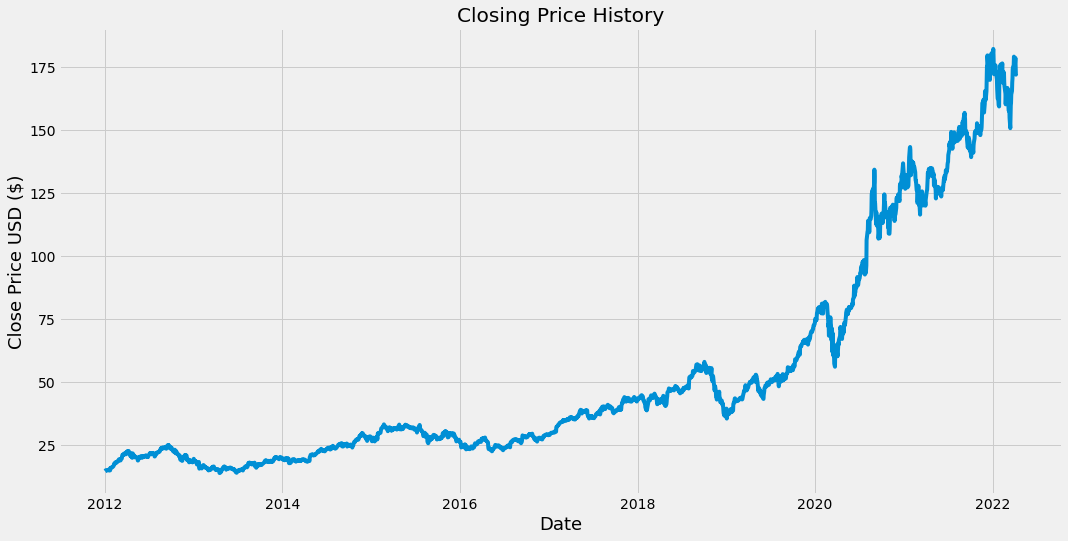

In [40]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [41]:
# Create a new dataframe with only the close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2068

In [42]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.95864635],
       [0.93942734],
       [0.94127188]])

In [43]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [44]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [45]:
x_train.shape

(2008, 60)

In [46]:
# Reshape the data
# x_train = np.reshape(x_train, (2008, 60, 1))
# x_train.shape[0] = 2008
# x_train.shape[1] = 60
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2008, 60, 1)

In [47]:
# Build the LSTM model
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2008/2008 [==============================] - 74s 35ms/step - loss: 2.2544e-04


In [50]:
# Create the testing dataset
# Create a new array containing scaled values from index 2008 to 2585
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [51]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [52]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [54]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8.704588146781198

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


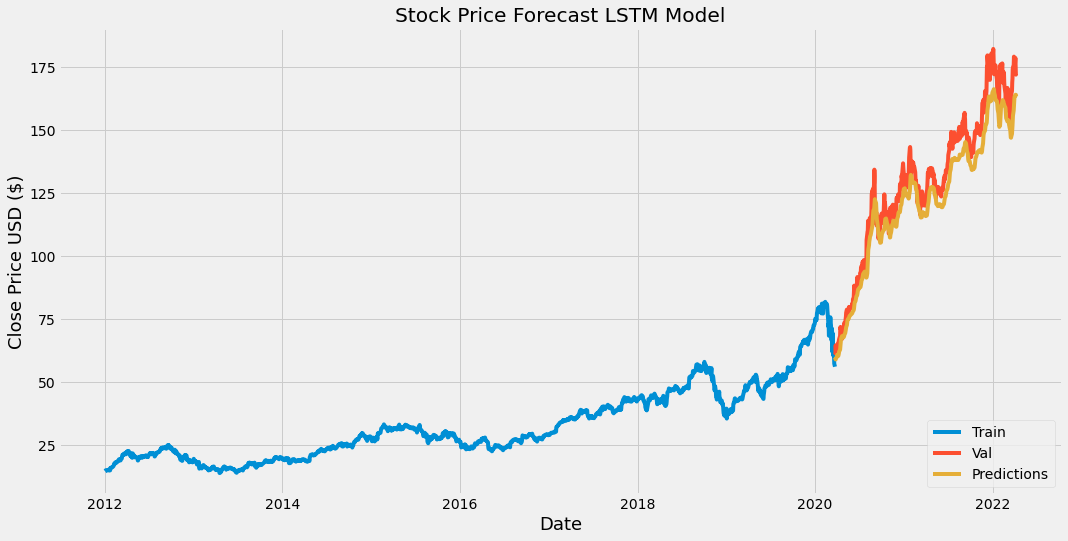

In [55]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Stock Price Forecast LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right') # loc = location
plt.show()

In [56]:
# Show the valid and predictions prices
valid

,Close,Predictions
Date,,
2020-03-24,61.720001,59.713562
2020-03-25,61.380001,59.132069
2020-03-26,64.610001,58.971607
2020-03-27,61.935001,59.451546
2020-03-30,63.702499,59.822411
...,...,...
2022-04-01,174.309998,163.295807
2022-04-04,178.440002,163.416534
2022-04-05,175.059998,163.852203


In [57]:
# Try to predict closing price for next closing price

# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-04-07')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
predicted_price = model.predict(X_test)
# Undo the sdcaling
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[[162.52255]]


In [58]:
# Get actual price
actual_price = web.DataReader('AAPL', data_source='yahoo', start='2022-04-08', end='2022-04-08')
print(actual_price['Close'])

Date
2022-04-08    170.089996
Name: Close, dtype: float64
